In [176]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies/movies.csv
/kaggle/input/httpswwwkagglecomdanielgrijalvasmovies/redirect


In [177]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'../input/movies/movies.csv')

In [178]:
# i want to look heare if there's any missing data so lets see if there is or there isn't.
head = df.head()

In [179]:
print(head)

       budget                                 company country        director  \
0   8000000.0           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000.0                      Paramount Pictures     USA     John Hughes   
2  15000000.0                      Paramount Pictures     USA      Tony Scott   
3  18500000.0  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000.0                    Walt Disney Pictures     USA  Randal Kleiser   

       genre        gross                      name rating    released  \
0  Adventure   52287414.0               Stand by Me      R  1986-08-22   
1     Comedy   70136369.0  Ferris Bueller's Day Off  PG-13  1986-06-11   
2     Action  179800601.0                   Top Gun     PG  1986-05-16   
3     Action   85160248.0                    Aliens      R  1986-07-18   
4  Adventure   18564613.0   Flight of the Navigator     PG  1986-08-01   

   runtime  score               star   votes         writer  year  


In [180]:
for col in df.columns:
    missingattr = np.mean(df[col].isnull())

In [181]:

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [182]:
# Data Types for our columns

print(df.dtypes)

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object


In [183]:
# Changing the Data_Types of columns to int64
df['gross'] = df['gross'].astype('int64')

In [184]:
# I am going to add release year match with year by creating a new column called year_correct 
df['year_correct']=df['released'].astype('str').str[:4]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016


<AxesSubplot:xlabel='gross', ylabel='budget'>

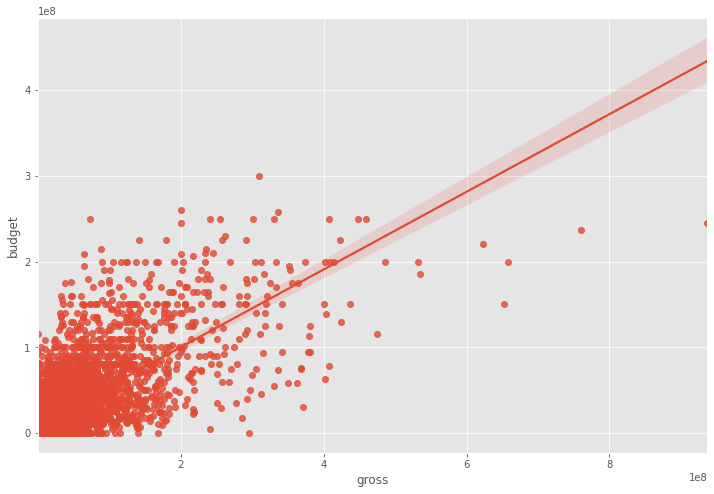

In [185]:

sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

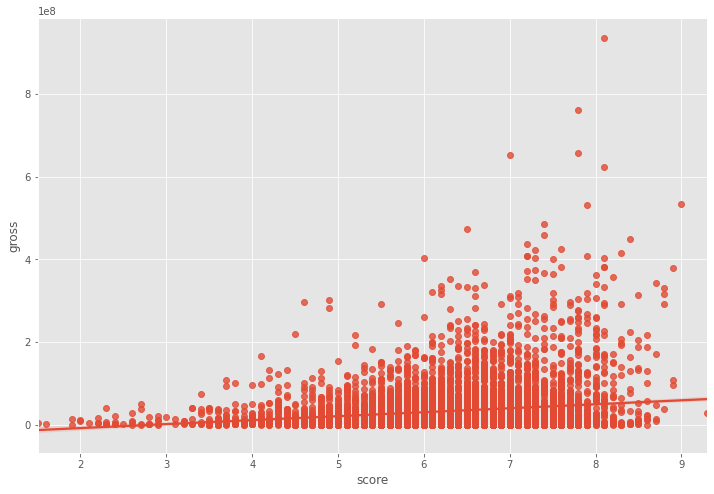

In [186]:
sns.regplot(x="score", y="gross", data=df)


In [187]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [188]:

df.corr(method ='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [189]:
df.corr(method ='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000


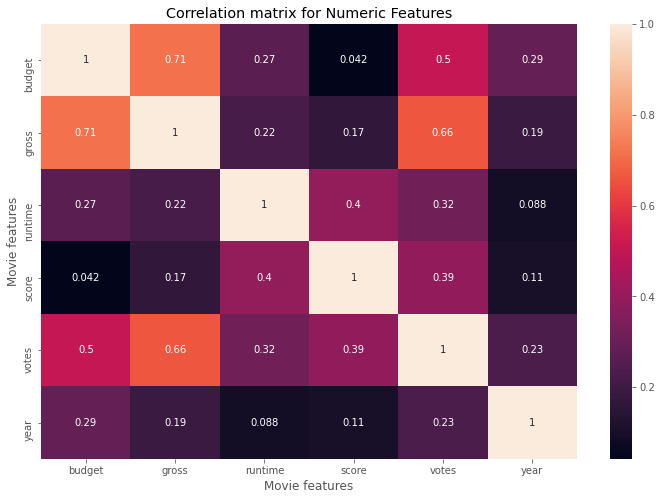

In [190]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [191]:

# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
budget,1.000000,-0.053390,-0.058972,0.098884,0.009617,0.265780,0.260056,0.033532,0.267866,0.182441,-0.019359,0.082724,0.276622,0.168884,0.274476,0.227619
company,-0.053390,1.000000,0.207891,0.528937,0.083304,0.595539,0.585783,0.035007,0.590363,-0.017205,-0.028393,0.499675,0.556854,0.525347,0.589459,0.459923
country,-0.058972,0.207891,1.000000,0.139928,0.026460,0.110702,0.109299,0.170565,0.114623,0.088068,-0.010712,0.153764,0.101652,0.138723,0.107460,0.092074
director,0.098884,0.528937,0.139928,1.000000,0.050684,0.718102,0.708987,0.059209,0.714279,-0.048564,-0.015889,0.621374,0.692806,0.711480,0.716466,0.566743
genre,0.009617,0.083304,0.026460,0.050684,1.000000,0.061585,0.064614,0.045332,0.063290,0.068504,-0.044007,0.064794,0.057885,0.054884,0.063244,0.054964
gross,0.265780,0.595539,0.110702,0.718102,0.061585,1.000000,0.980170,0.015757,0.988701,0.067788,-0.036941,0.696549,0.963910,0.795554,0.997612,0.795888
name,0.260056,0.585783,0.109299,0.708987,0.064614,0.980170,1.000000,0.016060,0.971935,0.065114,-0.035479,0.686017,0.946291,0.786625,0.980672,0.781578
rating,0.033532,0.035007,0.170565,0.059209,0.045332,0.015757,0.016060,1.000000,0.018538,0.019492,0.012675,0.083682,0.007277,0.037288,0.012236,0.021475
released,0.267866,0.590363,0.114623,0.714279,0.063290,0.988701,0.971935,0.018538,1.000000,0.073431,-0.039006,0.692609,0.955360,0.790091,0.989946,0.798753
runtime,0.182441,-0.017205,0.088068,-0.048564,0.068504,0.067788,0.065114,0.019492,0.073431,1.000000,-0.010943,-0.005030,0.080750,0.016035,0.075231,0.065295


In [192]:
df.drop('year', inplace=True, axis=1)



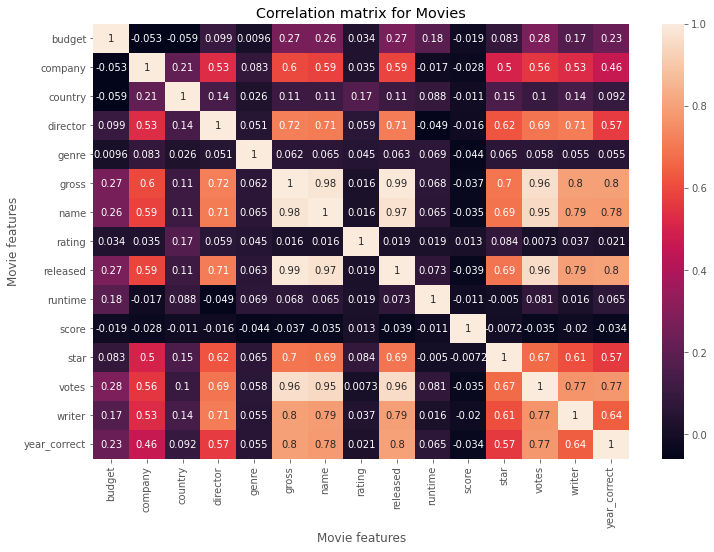

In [193]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [194]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget        budget          1.000000
              company        -0.053390
              country        -0.058972
              director        0.098884
              genre           0.009617
                                ...   
year_correct  score          -0.034471
              star            0.565517
              votes           0.774733
              writer          0.641339
              year_correct    1.000000
Length: 225, dtype: float64


In [195]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget        country        -0.058972
country       budget         -0.058972
budget        company        -0.053390
company       budget         -0.053390
director      runtime        -0.048564
                                ...   
              director        1.000000
country       country         1.000000
company       company         1.000000
writer        writer          1.000000
year_correct  year_correct    1.000000
Length: 225, dtype: float64


In [196]:

# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

writer        company         0.525347
company       writer          0.525347
              director        0.528937
director      company         0.528937
company       votes           0.556854
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
writer        writer          1.000000
year_correct  year_correct    1.000000
Length: 83, dtype: float64


In [197]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

In [198]:

df['Year'] = df['released'].astype(str).str[:4]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year_correct,Year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016


In [199]:
df.groupby(['company', 'year_correct'])[["gross"]].sum()


,,gross
company,year_correct,
"""DIA"" Productions GmbH & Co. KG",2003,26183197
1+2 Seisaku Iinkai,2000,1136776
101st Street Films,1998,306715
10th Hole Productions,2010,103280
120 Films,2002,753501
...,...,...
Zucker Brothers Productions,1998,6940185
double A Films,2000,1568749
erbp,2014,444098


In [200]:
CompanyGrossSum = df.groupby(['company', 'year_correct'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year_correct'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                                 year_correct
Paramount Pictures                      2011            1486604229
Warner Bros.                            2008            1421065118
Universal Pictures                      2015            1411300658
Warner Bros.                            2010            1255477478
                                        2005            1205774806
                                        2011            1185679738
Twentieth Century Fox Film Corporation  2009            1173191407
Warner Bros.                            2007            1146874347
                                        2009            1146640373
Walt Disney Pictures                    2010            1134883375
Universal Pictures                      2013            1079237858
                                        2007            1078519213
Columbia Pictures                       2011            1020979460
Warner Bros.                            2006            1003692415
Columbia 

In [201]:

CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

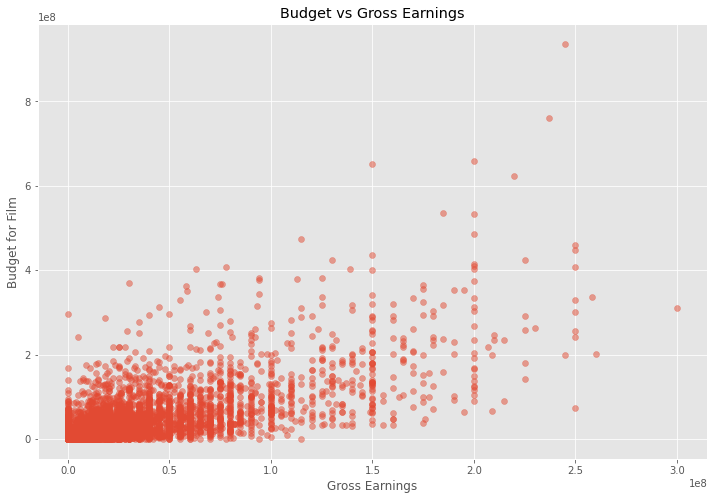

In [202]:

plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [203]:
df


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year_correct,Year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016


In [204]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year_correct,Year
0,8000000.0,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,0,0
1,6000000.0,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,0,0
2,15000000.0,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,0,0
3,18500000.0,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,0,0
4,9000000.0,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,1013,53,1623,4,4750497,230,8,2335,91,5.4,1066,9161,1800,30,30
6816,0.0,1914,54,1989,6,28368,3430,7,2320,90,4.9,2146,1959,3008,30,30
6817,3500000.0,2124,54,2313,2,3775000,577,8,2336,76,6.5,1355,36333,450,30,30
6818,0.0,415,54,1914,6,25981,5272,8,2361,76,6.2,1370,6947,2946,30,30


In [205]:
df_numerized.corr(method='pearson')


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year_correct,Year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.274820,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.028012,0.028012
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.062707,-0.062707
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,0.001823,0.001823
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.039014,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008381,0.662457,-0.009455,0.176879,0.176879
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.023411,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.016696,0.079542,0.019271,0.007891,0.011678,0.010741,0.017438,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025506,0.221736,-0.004634,0.999389,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.088342,0.088342


In [209]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget  budget          1.000000
        company         0.187205
        country         0.137635
        director        0.011602
        genre          -0.346794
                          ...   
Year    star           -0.026052
        votes           0.220797
        writer         -0.004546
        year_correct    1.000000
        Year            1.000000
Length: 256, dtype: float64

In [213]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.346794
genre         budget         -0.346794
gross         genre          -0.242676
genre         gross          -0.242676
score         country        -0.174414
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
year_correct  year_correct    1.000000
Year          Year            1.000000
Length: 256, dtype: float64

In [214]:
high_corr = sorted_pairs [sorted_pairs > 0.5]
high_corr

budget        votes           0.503924
votes         budget          0.503924
              gross           0.662457
gross         votes           0.662457
budget        gross           0.712196
gross         budget          0.712196
Year          released        0.999389
released      year_correct    0.999389
              Year            0.999389
year_correct  released        0.999389
              Year            1.000000
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
Year          year_correct    1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company    

In [ ]:
# Votes and budjet has highest correlation to gross earnings
# Company has low correlation.